In [11]:
# !pip install ipympl 
import numpy as np
from matplotlib import pyplot as plt
from typing import Tuple, Mapping
%matplotlib ipympl
from mpl_toolkits.mplot3d import Axes3D

### Функция Бута: $f(x, y)=(x + 2y - 7)^2 + (2x + y - 5)^2$

### Глобальный минимум: $f(1, 3) = 0$

### Метод поиска: $-10 \leq x, y \leq 10$

In [2]:
def func_but(x:np.ndarray, y:np.ndarray):
    return (x + 2 * y - 7) * (x + 2 * y - 7) + (2 * x + y - 5) * (2 * x + y - 5) # исходная функция 

def dx_but(x:np.ndarray, y:np.ndarray):
    return 10 * x + 8 * y - 34 # производная по х

def dy_but(x:np.ndarray, y:np.ndarray):
    return 10 * y + 8 * x - 38 # производня по у

### Функция МакКормика: $f(x, y)=sin(x + y) + (x - y)^2 - 1.5x + 2.5y + 1$

### Глобальный минимум: $f(-0.54719, -1.54719) = -1.9133$

### Метод поиска: 

### $-1.5 \leq x \leq 4$

### $-3 \leq y \leq 4$

In [3]:
def func_korm(x:np.ndarray, y:np.ndarray):
    return np.sin(x + y) + (x - y) * (x - y) - 1.5 * x + 2.5 * y + 1 # исходная функция 

def dx_korm(x:np.ndarray, y:np.ndarray):
    return np.cos(x + y) + 2 * x - 2 * y - 1.5 # производная по х

def dy_korm(x:np.ndarray, y:np.ndarray):
    return np.cos(y + x) + 2 * y - 2 * x + 2.5 # производня по у

### Функция Химмельблау: $f(x, y)=(x^2 + y - 11)^2 + (x + y^2 - 7)^2$

### Глобальный минимум: $\begin{equation*}
Min = 
 \begin{cases}
   f(3.0, 2.0) = 0.0\\
   f(-2.805118, 3.131312) = 0.0\\
   f(-3.77931, -3.283186) = 0.0\\
   f(3.584428, -1.848126) = 0.0
 \end{cases}
\end{equation*}$

### Метод поиска: $-5 \leq x, y \leq 5$

In [4]:
def func_him(x:np.ndarray, y:np.ndarray):
    return (x * x  + y - 11) * (x * x  + y - 11) + (x + y * y - 7) * (x + y * y - 7) # исходная функция 

def dx_him(x:np.ndarray, y:np.ndarray):
    return 4 * x * x * x + x * (4 * y - 42) + 2 * y * y - 14 # производная по х

def dy_him(x:np.ndarray, y:np.ndarray):
    return 4 * y * y * y + y * (4 * x - 26) + 2 * x * x - 22 # производня по у

### Шедулер ака Pytorch StepLR

In [5]:
class lr_scheduler():
    def __init__(self, step_size:int=1000, gamma:float=0.1, lr:float=0.1):
        '''
        step_size -- количество итераций необходимое для уменьшения скорости обучения
        gamma -- коэффициент на который домнажается скорость обучеия каждые step_size шагов
        lr -- скорость обучения
        '''
        self.iter  = 0 # переменная для подсчета шагов
        self.step_size = step_size
        self.gamma = gamma
        self.lr = lr

    def step(self):
        self.iter += 1
        if self.iter == self.step_size: # когда число итераций становится равно заданному порогу -> уменьшаем скорость обучения
            self.lr = self.lr * self.gamma
            self.iter = 0
        return self.lr

### Функция построения графиков работы алгоритмов

In [6]:
def plot_graphics(f:Mapping, x_min:float, x_max:float, y_min:float, y_max:float, log):
    plt.ioff()
    a = np.arange(x_min, x_max, 0.1)
    b = np.arange(y_min, y_max,0.1)
    xgrid, ygrid = np.meshgrid(a, b)

    zgrid = f(xgrid,ygrid)
    fig = plt.figure(figsize=(7, 4))
    ax_3d = Axes3D(fig, auto_add_to_figure=True)
    ax_3d.plot_surface(xgrid, ygrid, zgrid, cmap='plasma', alpha=0.5)
    ax_3d.set_xlabel('x')
    ax_3d.set_ylabel('y')
    ax_3d.set_zlabel('f')

    for i in range(len(log)):
        ax_3d.scatter(log[i][0], log[i][1], log[i][2], c='red')
        
    plt.show()

### Реализация алгоритма градиентного спуска

In [7]:
def GD(f:Mapping, dx:Mapping, dy:Mapping, x0:np.ndarray, y0:np.ndarray, lr_start:float=0.001, iter=100, thr:float=None) -> np.ndarray:
    '''
        f -- исходная функция
        dx -- производня по х от исходной функции
        dy -- производня по у от исходной функции
        x0 -- стартовая точка по координате х
        y0 -- стартовая точка по координате у
        lr_start -- изначальное значение скорости обучения
        iter -- число итераций выполнения алгоритма
        thr -- точность вычислений 
    '''
    log = list()
    x_old = x0.copy()
    y_old = y0.copy()
    
    scheduler = lr_scheduler(lr=lr_start)
    for i in range(iter):
        if np.linalg.norm(dx(x_old, y_old)) > thr and np.linalg.norm(dy(x_old, y_old)) > thr:
            gradX = dx(x_old, y_old)
            gradY = dy(x_old, y_old)
            x_old = x_old - scheduler.lr * gradX
            y_old = y_old - scheduler.lr * gradY
            log.append([x_old, y_old, f(x_old, y_old)])
            scheduler.step()
    return x_old, y_old, log

### Реализация алгоритма стохастического градиентного спуска

In [8]:
def SGD(f:Mapping, dx:Mapping, dy:Mapping, x0:np.ndarray, y0:np.ndarray, lr_start:float=0.1, iter=100, thr:float=None, momentum:float=0.9)  -> np.ndarray:
    '''
        f -- исходная функция
        dx -- производня по х от исходной функции
        dy -- производня по у от исходной функции
        x0 -- стартовая точка по координате х
        y0 -- стартовая точка по координате у
        lr_start -- изначальное значение скорости обучения
        iter -- число итераций выполнения алгоритма
        thr -- точность вычислений 
    '''
    log = list()
    x_old = x0.copy()
    y_old = y0.copy()
    scheduler = lr_scheduler(lr=lr_start)
    gx = 0
    gy = 0
    for i in range(iter):
        if np.linalg.norm(dx(x_old, y_old)) > thr and np.linalg.norm(dy(x_old, y_old)) > thr:
            gradX = dx(x_old, y_old)
            gradY = dy(x_old, y_old)
            if i == 1:
                gx = gradX
                gy = gradY
            else:
                gx = gradX + momentum * gx
                gy = gradY + momentum * gy
            x_old = x_old - scheduler.lr * gx
            y_old = y_old - scheduler.lr * gy
            log.append([x_old, y_old, f(x_old, y_old)])
            scheduler.step()
    return x_old, y_old, log

### Реалищация алгоритма ADAGRAD

In [9]:
def ADAGRAD(f:Mapping, dx:Mapping, dy:Mapping, x0:np.ndarray, y0:np.ndarray, lr_start:float=0.1, iter=100, thr:float=None, momentum:float=0.9)  -> np.ndarray:
    '''
        f -- исходная функция
        dx -- производня по х от исходной функции
        dy -- производня по у от исходной функции
        x0 -- стартовая точка по координате х
        y0 -- стартовая точка по координате у
        lr_start -- изначальное значение скорости обучения
        iter -- число итераций выполнения алгоритма
        thr -- точность вычислений 
    '''
    log = list()
    x_old = x0.copy()
    y_old = y0.copy()
    scheduler = lr_scheduler(step_size=10000 ,lr=lr_start)
    s_sum_x = 0
    s_sum_y = 0
    for i in range(iter):
        if np.linalg.norm(dx(x_old, y_old)) > thr and np.linalg.norm(dy(x_old, y_old)) > thr:
            gradX = dx(x_old, y_old)
            gradY = dy(x_old, y_old)
            s_sum_x = s_sum_x + gradX ** 2
            s_sum_y = s_sum_y + gradY ** 2
            x_old = x_old - scheduler.lr * gradX / (s_sum_x ** 0.5)
            y_old = y_old - scheduler.lr * gradY / (s_sum_y ** 0.5)
            log.append([x_old, y_old, f(x_old, y_old)])
            scheduler.step()
    return x_old, y_old, log

# Тестирование функции Бута

### Алгоритм GD

#### Установленный глобальный минимум: $f(1, 3) = 0$

In [10]:
x, y, log = GD(f=func_but, dx=dx_but, dy=dy_but, x0=np.array([-2]), y0=np.array([-2]), iter=2000, thr=0.0001)
plot_graphics(func_but, -10, 10, -10, 10, log)
print(f"Начальная точка: [{-2}], [{-2}]")
print(f'Точка найденного минимума: {x}, {y}')
print(f'Значение функции в найденной точке: {func_but(x, y)}')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  if __name__ == "__main__":


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Начальная точка: [-2], [-2]
Точка найденного минимума: [1.11057926], [2.88942073]
Значение функции в найденной точке: [0.02445555]


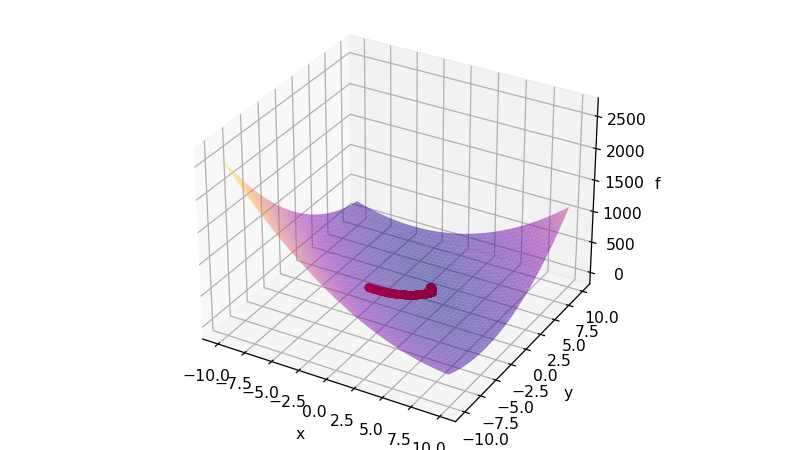

### Алгоритм SGD

In [13]:
x, y, log = SGD(f=func_but, dx=dx_but, dy=dy_but, x0=np.array([-1]), y0=np.array([-1]), iter=100, thr=1e-4)
plot_graphics(func_but, -10, 10, -10, 10, log)
print(f"Начальная точка: [{-1}], [{-1}]")
print(f'Точка найденного минимума: {x}, {y}')
print(f'Значение функции в найденной точке: {func_but(x, y)}')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  if __name__ == "__main__":


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Начальная точка: [-1], [-1]
Точка найденного минимума: [1.01655077], [3.0176116]
Значение функции в найденной точке: [0.00525237]


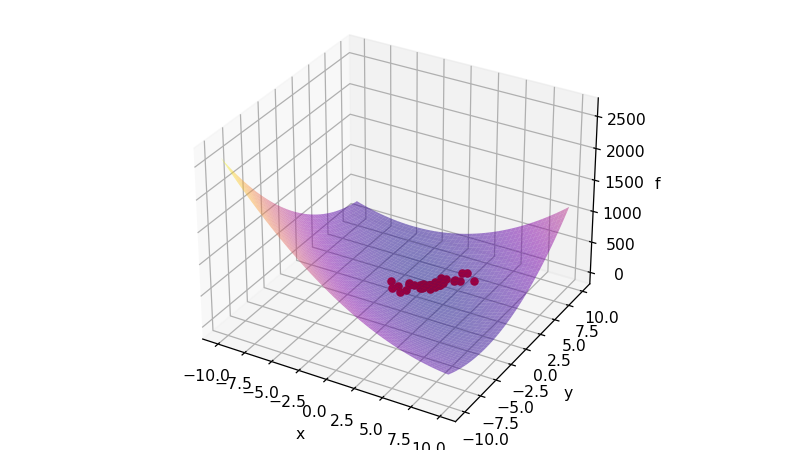

### Алгоритм ADAGRAD

In [18]:
x, y, log = ADAGRAD(f=func_but, dx=dx_but, dy=dy_but, x0=np.array([-2]), y0=np.array([-2]), iter=4000, thr=1e-4)
plot_graphics(func_but, -10, 10, -10, 10, log)
print(f"Начальная точка: [{-2}], [{-2}]")
print(f'Точка найденного минимума: {x}, {y}')
print(f'Значение функции в найденной точке: {func_but(x, y)}')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  if __name__ == "__main__":


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Начальная точка: [-2], [-2]
Точка найденного минимума: [1.40028], [2.59243682]
Значение функции в найденной точке: [0.326544]


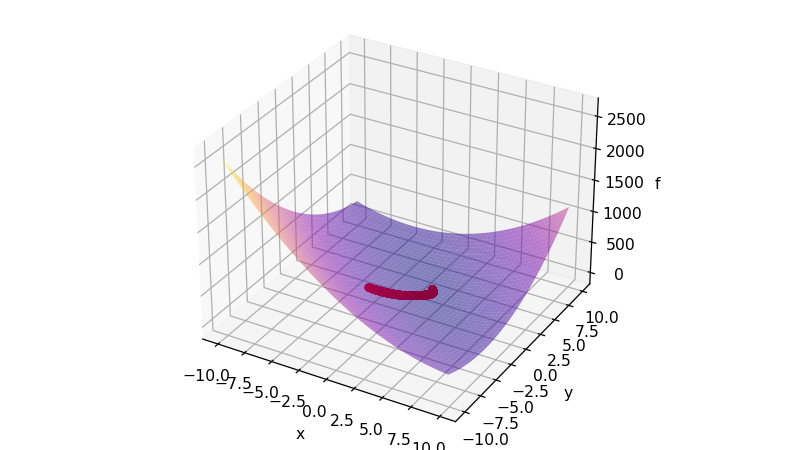

# Тестирование функции МакКормика

### Алгоритм GD

In [20]:
x, y, log = GD(f=func_korm, dx=dx_korm, dy=dy_korm, x0=np.array([-1.5]), y0=np.array([4]), iter=2000, thr=1e-10)
plot_graphics(func_korm, -1.5, 4, -3, 4, log)
print(f"Начальная точка: [{-1.5}], [{4}]")
print(f'Точка найденного минимума: {x}, {y}')
print(f'Значение функции в найденной точке: {func_korm(x, y)}')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  if __name__ == "__main__":


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Начальная точка: [-1.5], [4]
Точка найденного минимума: [2.19615235], [1.27531116]
Значение функции в найденной точке: [1.41807702]


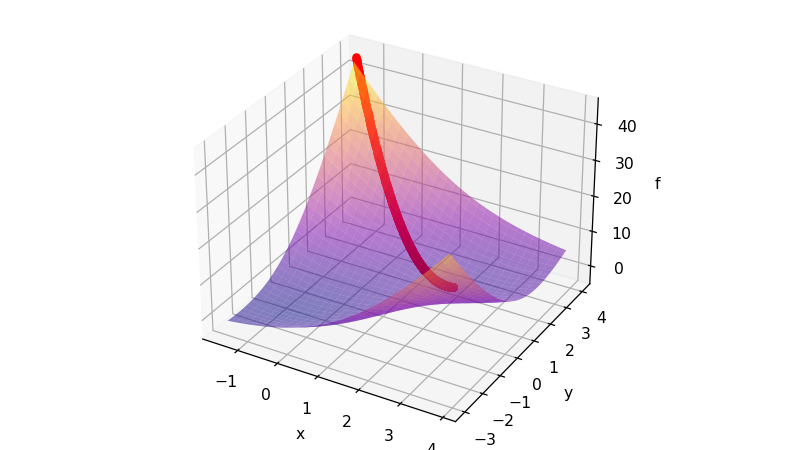

### Алгоритм SGD

In [23]:
x, y, log = SGD(f=func_korm, dx=dx_korm, dy=dy_korm, x0=np.array([-1.5]), y0=np.array([4]), lr_start=0.1, iter=2000, thr=1e-10)
plot_graphics(func_korm, -1.5, 4, -3, 4, log)
print(f"Начальная точка: [{-1.5}], [{4}]")
print(f'Точка найденного минимума: {x}, {y}')
print(f'Значение функции в найденной точке: {func_korm(x, y)}')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  if __name__ == "__main__":


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Начальная точка: [-1.5], [4]
Точка найденного минимума: [2.5943951], [1.5943951]
Значение функции в найденной точке: [1.2283697]


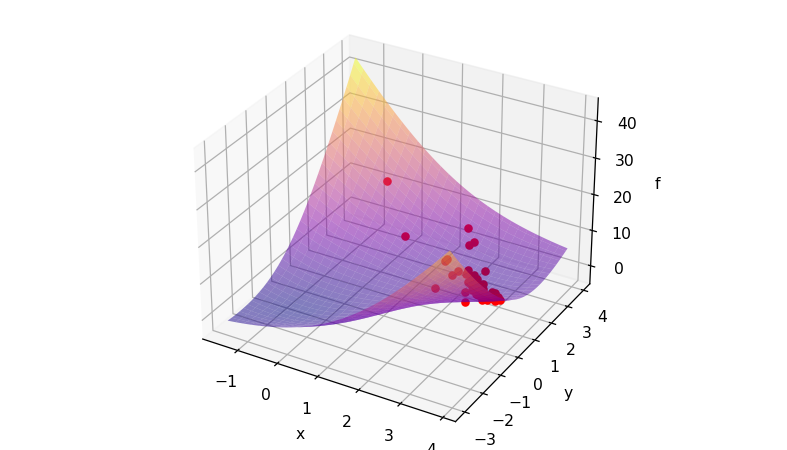

### Алгоритм ADAGRAD

In [24]:
x, y, log = ADAGRAD(f=func_korm, dx=dx_korm, dy=dy_korm, x0=np.array([-1.5]), y0=np.array([4]), iter=1000, thr=1e-10)
plot_graphics(func_korm, -1.5, 4, -3, 4, log)
print(f"Начальная точка: [{-1.5}], [{4}]")
print(f'Точка найденного минимума: {x}, {y}')
print(f'Значение функции в найденной точке: {func_korm(x, y)}')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  if __name__ == "__main__":


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Начальная точка: [-1.5], [4]
Точка найденного минимума: [1.94204673], [1.07915417]
Значение функции в найденной точке: [1.64950004]


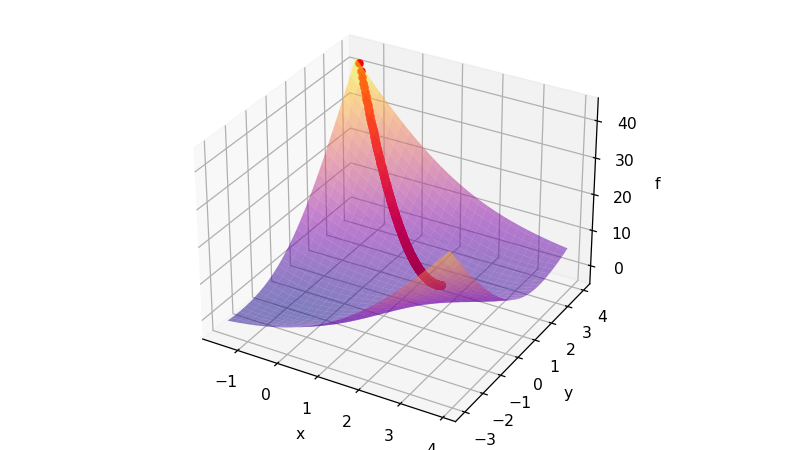

# Тестирование функции Химмельблау

### Алгоритм GD

In [27]:
x, y, log = GD(f=func_him, dx=dx_him, dy=dy_him, x0=np.array([-5]), y0=np.array([5]), iter=2000, thr=10)
plot_graphics(func_him, -5, 5, -5, 5, log)
print(f"Начальная точка: [{-5}], [{5}]")
print(f'Точка найденного минимума: {x}, {y}')
print(f'Значение функции в найденной точке: {func_him(x, y)}')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  if __name__ == "__main__":


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Начальная точка: [-5], [5]
Точка найденного минимума: [-2.98078782], [3.24652946]
Значение функции в найденной точке: [1.59324253]


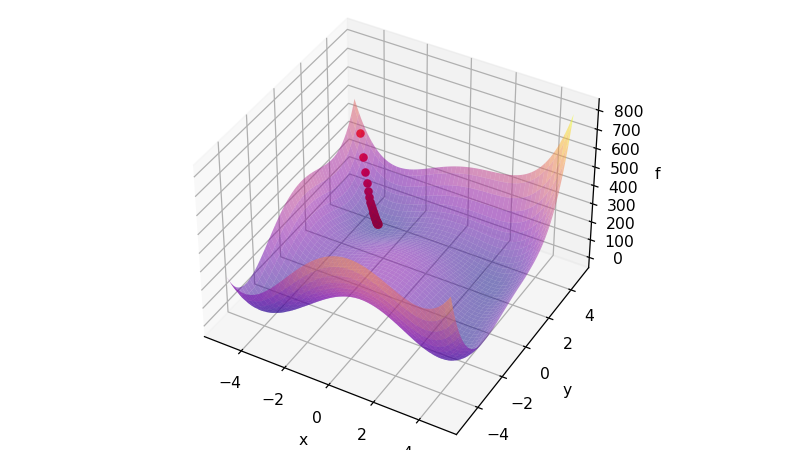

### Алгоритм ADAGRAD

In [30]:
x, y, log = ADAGRAD(f=func_him, dx=dx_him, dy=dy_him, x0=np.array([5]), y0=np.array([5]), iter=2000, thr=1e-5)
plot_graphics(func_him, -5, 5, -5, 5, log)
print(f"Начальная точка: [{5}], [{5}]")
print(f'Точка найденного минимума: {x}, {y}')
print(f'Значение функции в найденной точке: {func_him(x, y)}')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  if __name__ == "__main__":


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Начальная точка: [5], [5]
Точка найденного минимума: [2.95742113], [2.10744079]
Значение функции в найденной точке: [0.18036399]


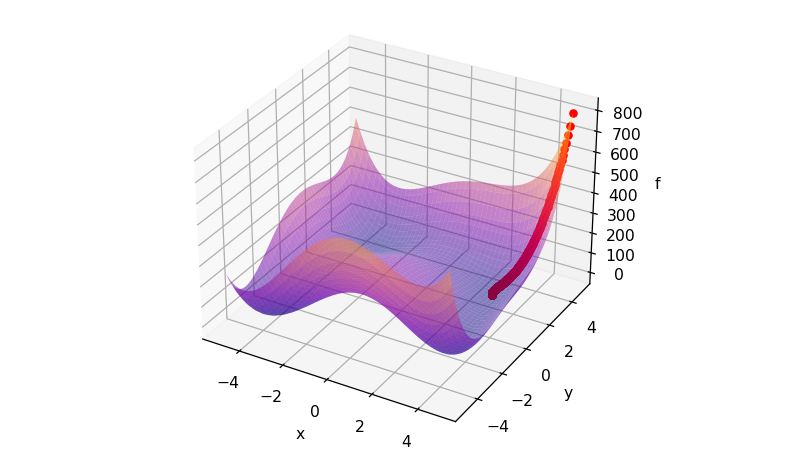